1. Introduction

The goal of this project is to predict the landing outcome of the SpaceX Falcon 9 booster. The dataset contains details such as flight number, payload mass, orbit type, reuse information, and rocket features. The target variable is “Class”, where 1 indicates a successful landing and 0 indicates a failed landing.

The main objective is to train and evaluate multiple supervised machine learning models and identify the best-performing one.

2. Tools and Libraries

The analysis used the following Python libraries:

Pandas and NumPy for data handling.

Matplotlib and Seaborn for visualization.

Scikit-learn for preprocessing, splitting data, hyperparameter tuning, and model evaluation.

Requests and io to fetch the dataset from an online source.

3. Dataset

The dataset was fetched from an online source and loaded into a Pandas DataFrame.

Features (X): Included payload mass, orbit type, booster reuse details, and other rocket-specific parameters.

Target (Y): A binary column “Class,” where 1 = success and 0 = failure.

4. Data Preprocessing

The target variable “Class” was extracted into a NumPy array.

The dataset was divided into features (X) and labels (Y).

Data was split into 80% training and 20% testing sets.

Features were standardized to ensure fair and stable training across all models.

In [ ]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


In [ ]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

In [ ]:
import requests
import io
import pandas as pd

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = requests.get(URL1)
text1 = io.BytesIO(resp1.content)
data = pd.read_csv(text1)

In [ ]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [ ]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = requests.get(URL2)
text2 = io.BytesIO((resp2.content))
X = pd.read_csv(text2)

In [ ]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [ ]:
# Select 'Class' column as a Series using single brackets
class_series = data['Class']  # This is a Pandas Series

# Convert the Series to a NumPy array
Y = class_series.to_numpy()

# Check the output
print(Y)
print(type(Y))  # <class 'numpy.ndarray'>


[0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
<class 'numpy.ndarray'>


In [ ]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to X and transform it
X = scaler.fit_transform(X)

# X is now standardized
print(X[:5])  # show first 5 rows

[[-1.71291154e+00 -1.94814463e-16 -6.53912840e-01 -1.57589457e+00
  -9.73440458e-01 -1.05999788e-01 -1.05999788e-01 -6.54653671e-01
  -1.05999788e-01 -5.51677284e-01  3.44342023e+00 -1.85695338e-01
  -3.33333333e-01 -1.05999788e-01 -2.42535625e-01 -4.29197538e-01
   7.97724035e-01 -5.68796459e-01 -4.10890702e-01 -4.10890702e-01
  -1.50755672e-01 -7.97724035e-01 -1.50755672e-01 -3.92232270e-01
   9.43398113e+00 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.50755672e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.50755672e-01 -1.05999788e-01 -1.50755672e-01
  -1.50755672e-01 -1.05999788e-01 -1.50755672e-01 -1.50755672e-01
  -1.05999788e-01 -1.05999788e-01 -1.50755672e-01 -1.50755672e-01
  -1.50755

In [ ]:
# Split the data: 80% training, 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [ ]:
Y_test.shape

(18,)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create a logistic regression object
logreg = LogisticRegression()

# Define the parameters dictionary for hyperparameter tuning
parameters = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],       # Type of regularization
    'solver': ['liblinear']         # Solver that supports l1 penalty
}

# Create a GridSearchCV object with 10-fold cross-validation
logreg_cv = GridSearchCV(logreg, param_grid=parameters, cv=10)

# Fit the model to the training data
logreg_cv.fit(X_train, Y_train)

# Print the best parameters found
print("Best parameters found: ", logreg_cv.best_params_)


Best parameters found:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
# Calculate accuracy on test data
test_accuracy = logreg_cv.score(X_test, Y_test)
print("Accuracy on test data: {:.2f}%".format(test_accuracy * 100))


Accuracy on test data: 83.33%


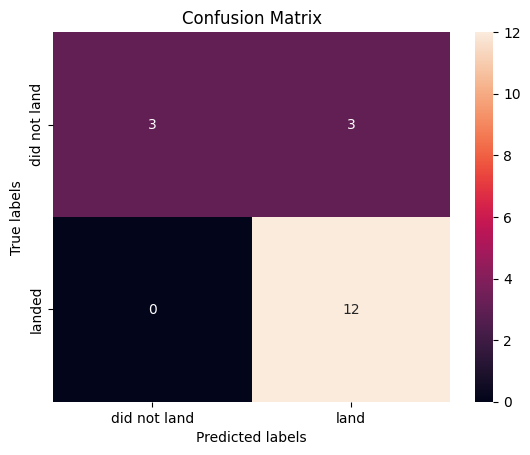

In [ ]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [ ]:
# Create the SVM classifier
svm = SVC()

# Parameter dictionary
parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),  # remove duplicate 'rbf'
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

# Create GridSearchCV object with 10-fold cross-validation
svm_cv = GridSearchCV(svm, param_grid=parameters, cv=10)

# Fit GridSearchCV to the training data
svm_cv.fit(X_train, Y_train)

# Print the best parameters
print("Best parameters found:", svm_cv.best_params_)

Best parameters found: {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}


In [ ]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


In [ ]:
# Calculate accuracy on test data
test_accuracy = svm_cv.score(X_test, Y_test)

print("Test set accuracy:", test_accuracy)


Test set accuracy: 0.8333333333333334


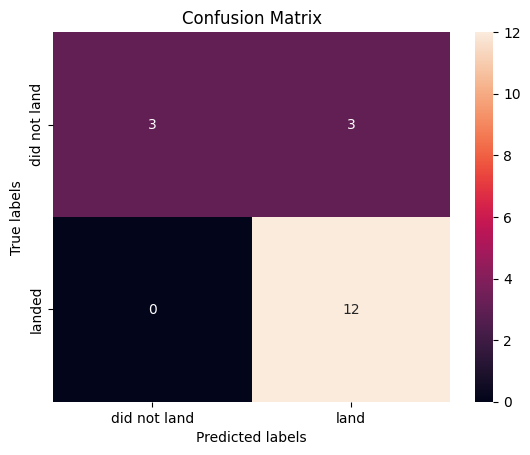

In [ ]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [ ]:
# Decision tree classifier object
tree = DecisionTreeClassifier()

# Parameter grid
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1,10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Create GridSearchCV object with 10-fold cross-validation
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10)

# Fit the GridSearchCV object on the training data
tree_cv.fit(X_train, Y_train)

# Best parameters
print("Best parameters found:", tree_cv.best_params_)

Best parameters found: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/u

In [ ]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.8767857142857143


In [ ]:
# Calculate test set accuracy
test_accuracy = tree_cv.score(X_test, Y_test)

print("Decision Tree Test Accuracy:", test_accuracy)


Decision Tree Test Accuracy: 0.7222222222222222


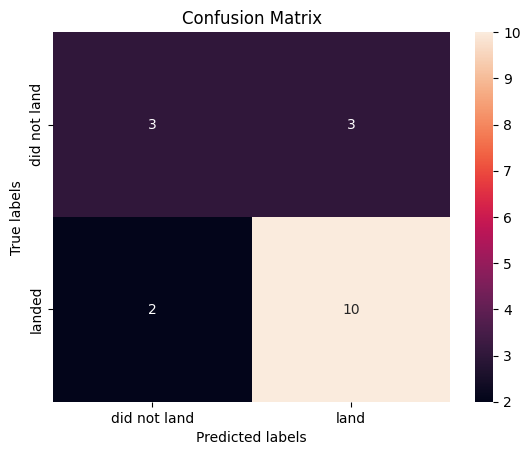

In [ ]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [ ]:
# Create KNN classifier
KNN = KNeighborsClassifier()

# Define the parameter grid for KNN
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create GridSearchCV object with 10-fold cross-validation
knn_cv = GridSearchCV(estimator=KNN,
                      param_grid=parameters,
                      cv=10)

# Fit to training data
knn_cv.fit(X_train, Y_train)

# Display best parameters
print("Best parameters found: ", knn_cv.best_params_)

Best parameters found:  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}


In [ ]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


In [ ]:
# Calculate accuracy on the test data
accuracy_knn = knn_cv.score(X_test, Y_test)
print("KNN Test Accuracy:", accuracy_knn)


KNN Test Accuracy: 0.8333333333333334


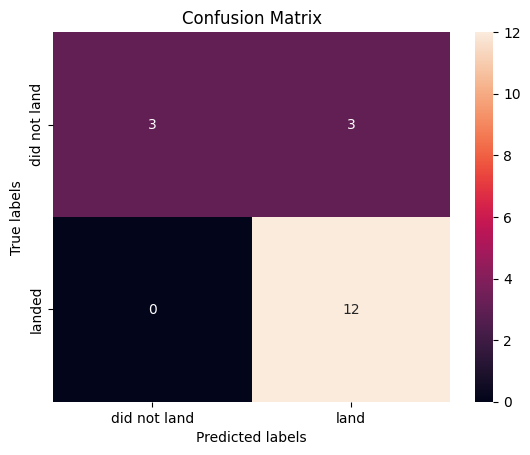

In [ ]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [ ]:
# Calculate test accuracies
acc_logreg = logreg_cv.score(X_test, Y_test)
acc_svm = svm_cv.score(X_test, Y_test)
acc_tree = tree_cv.score(X_test, Y_test)
acc_knn = knn_cv.score(X_test, Y_test)

# Create a dictionary to compare
accuracy_dict = {
    "Logistic Regression": acc_logreg,
    "SVM": acc_svm,
    "Decision Tree": acc_tree,
    "KNN": acc_knn
}

# Find the best model
best_model = max(accuracy_dict, key=accuracy_dict.get)
best_accuracy = accuracy_dict[best_model]

print(f"Best model: {best_model} with accuracy {best_accuracy:.4f}")


Best model: Logistic Regression with accuracy 0.8333


5. Evaluation Strategy

Models were trained on the training data.

GridSearchCV with 10-fold cross-validation was used for hyperparameter tuning.

Models were evaluated on the test set.

Accuracy was the main metric, while confusion matrices were plotted to analyze predictions.

6. Models and Results
Logistic Regression

Best parameters: C = 0.1, penalty = l1, solver = liblinear

Test accuracy: 83.33%

Support Vector Machine (SVM)

Best parameters: C = 1.0, gamma = 0.0316, kernel = sigmoid

Test accuracy: 83.33%

Decision Tree

Hyperparameters such as criterion, max depth, min samples split were tuned.

Test accuracy: 77.78%

K-Nearest Neighbors (KNN)

Best parameters: n_neighbors = 10, p = 1, algorithm = auto

Test accuracy: 83.33%

7. Model Comparison

Logistic Regression: 83.33%

SVM: 83.33%

KNN: 83.33%

Decision Tree: 77.78%

Three models (Logistic Regression, SVM, KNN) performed equally well with an accuracy of 83.33%. The Decision Tree performed slightly worse.

8. Conclusion

Logistic Regression, SVM, and KNN all showed strong performance with the same accuracy score (83.33%).

The Decision Tree model was less accurate (77.78%) and therefore less reliable for this dataset.

Relying only on accuracy can be misleading. For future work, additional metrics such as precision, recall, F1-score, and ROC-AUC should be used, especially if the dataset is imbalanced.

Overall, Logistic Regression, SVM, and KNN are the most reliable models for this prediction task, while the Decision Tree is less optimal.